<a href="https://colab.research.google.com/github/ignaras/clipit/blob/master/220514_Hive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Setup
from google.colab import output

nvidia_output = !nvidia-smi --query-gpu=memory.total --format=noheader,nounits,csv
gpu_memory = int(nvidia_output[0])
if gpu_memory < 14000:
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
  warning_string = f"--> GPU check: ONLY {gpu_memory} MiB available: Please use low quality or low res <--"
  print(warning_string)
  output.eval_js('alert("Warning - low GPU (see message)")')
else:
  print(f"GPU check: {gpu_memory} MiB available: this should be fine")

from IPython.utils import io
with io.capture_output() as captured:
  !pip install torch==1.9.0+cu102 torchtext==0.10.0 torchvision==0.10.0+cu102 torch-optimizer==0.1.0 -f https://download.pytorch.org/whl/torch/ -f https://download.pytorch.org/whl/torchvision/
  !git clone https://github.com/openai/CLIP
  # !pip install taming-transformers
  !git clone https://github.com/CompVis/taming-transformers.git
  !rm -Rf clipit
  !git clone https://github.com/dribnet/clipit.git
  !pip install ftfy regex tqdm omegaconf pytorch-lightning
  !pip install kornia==0.6.1
  !pip install imageio-ffmpeg   
  !pip install einops
  !pip install torch-optimizer
  !pip install easydict
  !pip install braceexpand
  !pip install git+https://github.com/pvigier/perlin-numpy

  # ClipDraw deps
  !pip install svgwrite
  !pip install svgpathtools
  !pip install cssutils
  !pip install numba
  !pip install torch-tools
  !pip install visdom

  !pip install gradio==2.3.7

  !git clone https://github.com/BachiLi/diffvg
  %cd diffvg
  # !ls
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..
  
  !mkdir -p steps
  !mkdir -p models

output.clear()
import sys
sys.path.append("clipit")

result_msg = "setup complete"
import IPython
import os
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")
  result_msg = "Please choose Runtime -> Restart Runtime from the menu, and then run Setup again"

js_code = f'''
document.querySelector("#output-area").appendChild(document.createTextNode("{result_msg}"));
'''
js_code += '''
for (rule of document.styleSheets[0].cssRules){
  if (rule.selectorText=='body') break
}
rule.style.fontSize = '30px'
'''
display(IPython.display.Javascript(js_code))

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## VQGAN + CLIP

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

8.19kB [00:00, 390kB/s]                    


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_imagenet_f16_16384.ckpt


100%|████████████████████████████████████████| 338M/338M [00:01<00:00, 248MiB/s]


Using device: cuda:0
Optimising using: Adam
Using text prompts: ['underwater city']
Using seed: 1184033351920353280


0it [00:00, ?it/s]

iter: 0, loss: 0.943447, losses: 0.943447


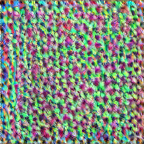

iter: 10, loss: 0.838493, losses: 0.838493
iter: 20, loss: 0.782012, losses: 0.782012
iter: 30, loss: 0.764834, losses: 0.764834
iter: 40, loss: 0.744468, losses: 0.744468
iter: 50, loss: 0.70651, losses: 0.70651


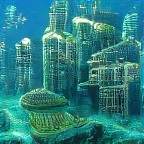

iter: 60, loss: 0.734186, losses: 0.734186
iter: 70, loss: 0.699331, losses: 0.699331
iter: 80, loss: 0.69646, losses: 0.69646
iter: 90, loss: 0.708664, losses: 0.708664
iter: 100, loss: 0.698692, losses: 0.698692


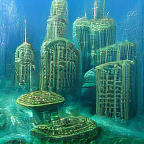

iter: 110, loss: 0.690772, losses: 0.690772
iter: 120, loss: 0.709174, losses: 0.709174
iter: 130, loss: 0.674493, losses: 0.674493
iter: 140, loss: 0.705712, losses: 0.705712
iter: 150, loss: 0.701958, losses: 0.701958


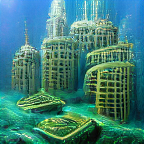

iter: 160, loss: 0.680328, losses: 0.680328
iter: 170, loss: 0.697573, losses: 0.697573
iter: 180, loss: 0.710807, losses: 0.710807
iter: 190, loss: 0.696306, losses: 0.696306
iter: 200, loss: 0.702676, losses: 0.702676


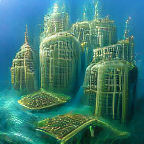

In [ ]:
import clipit
# To reset settings to default
clipit.reset_settings()
# You can use "|" to separate multiple prompts
prompts = "underwater city"
# You can trade off speed for quality: draft, normal, better, best
quality = "draft"
# Aspect ratio: widescreen, square
aspect = "square"
# Add settings
clipit.add_settings(prompts=prompts, quality=quality, aspect=aspect,display_every=50)
# Apply these settings and run
settings = clipit.apply_settings()
clipit.do_init(settings)
clipit.do_run(settings)

IMPORTANT: You are using gradio version 2.3.7, however version 2.5.1 is available, please upgrade.
--------
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
Running on public URL: https://55597.gradio.app
Interface loading below...


Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_imagenet_f16_16384.ckpt
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['Waiting for the elevator']
Using seed: 12685504529826310526


0it [00:00, ?it/s]

iter: 0, loss: 1.8905, losses: 0.951308, 0.939194


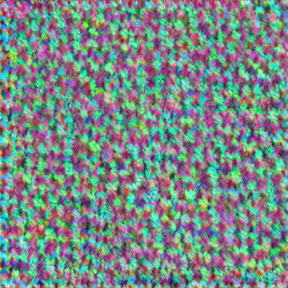

iter: 10, loss: 1.7353, losses: 0.880847, 0.854458


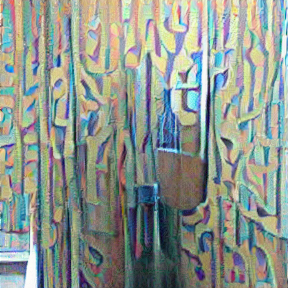

iter: 20, loss: 1.65484, losses: 0.844966, 0.809876


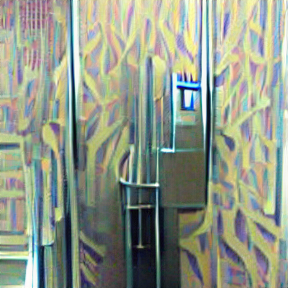

iter: 30, loss: 1.60261, losses: 0.812751, 0.789854


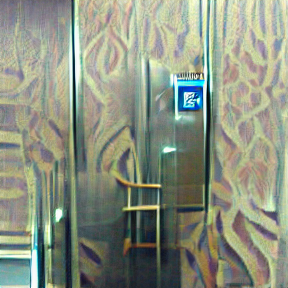

iter: 40, loss: 1.55577, losses: 0.785013, 0.770753


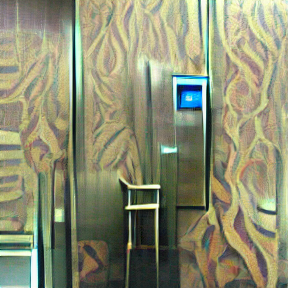

iter: 50, loss: 1.56018, losses: 0.789007, 0.771168


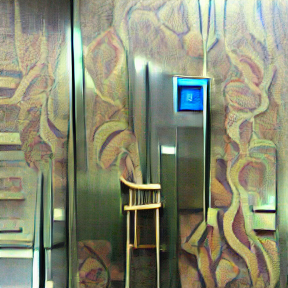

Generating video...


  0%|          | 0/49 [00:00<?, ?it/s]

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_imagenet_f16_16384.ckpt
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['Waiting in the Lobby?']
Using seed: 3783162467694022032


0it [00:00, ?it/s]

iter: 0, loss: 1.88184, losses: 0.949433, 0.932403


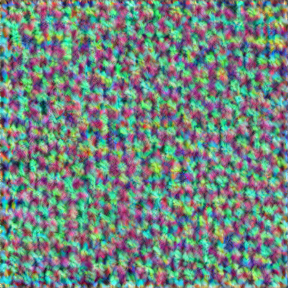

iter: 10, loss: 1.78938, losses: 0.892327, 0.89705


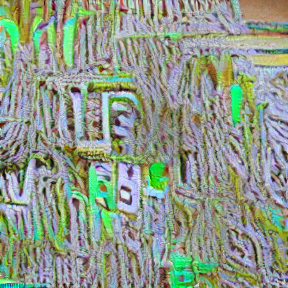

iter: 20, loss: 1.67202, losses: 0.83055, 0.841468


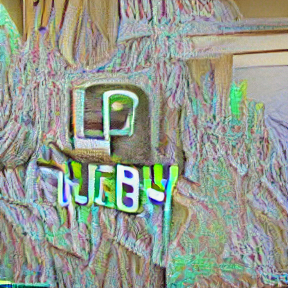

iter: 30, loss: 1.63132, losses: 0.812276, 0.819045


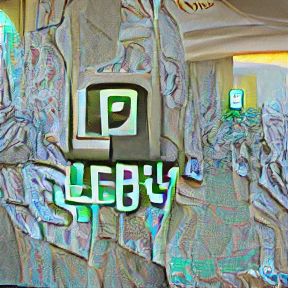

iter: 40, loss: 1.54255, losses: 0.767035, 0.775518


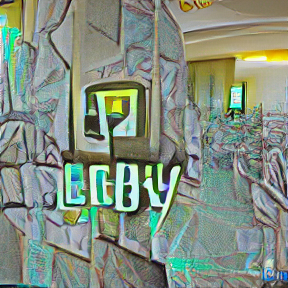

iter: 50, loss: 1.5606, losses: 0.77475, 0.785852


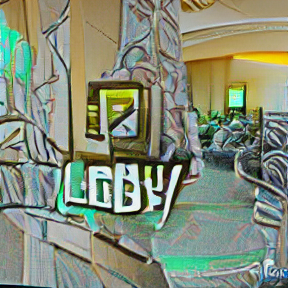

Generating video...


  0%|          | 0/49 [00:00<?, ?it/s]

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_imagenet_f16_16384.ckpt
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['Sitting lonely in the car']
Using seed: 8939229950077658880


0it [00:00, ?it/s]

iter: 0, loss: 1.90489, losses: 0.973934, 0.930959


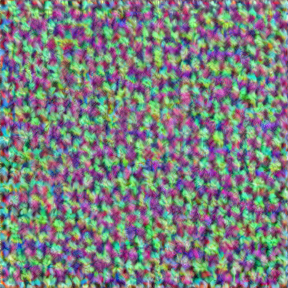

iter: 10, loss: 1.77142, losses: 0.894556, 0.876864


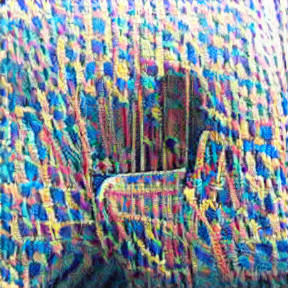

iter: 20, loss: 1.67682, losses: 0.846698, 0.830117


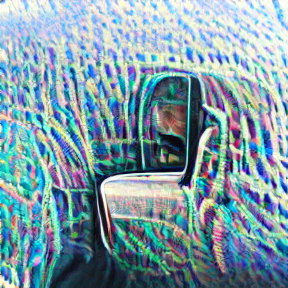

iter: 30, loss: 1.64202, losses: 0.83236, 0.809656


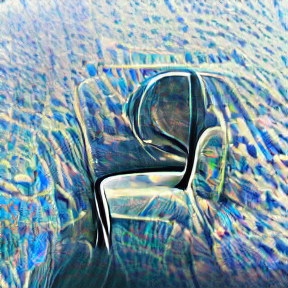

iter: 40, loss: 1.62311, losses: 0.810011, 0.813104


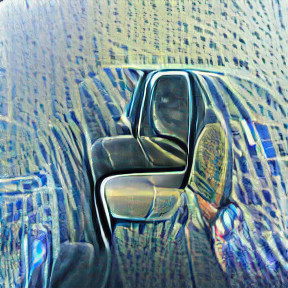

iter: 50, loss: 1.58002, losses: 0.791382, 0.788638


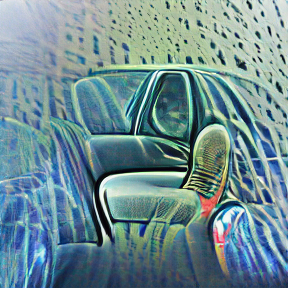

Generating video...


  0%|          | 0/49 [00:00<?, ?it/s]

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_imagenet_f16_16384.ckpt
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['Sitting in the conference room']
Using seed: 9403551205253390898


0it [00:00, ?it/s]

iter: 0, loss: 1.85739, losses: 0.939363, 0.918026


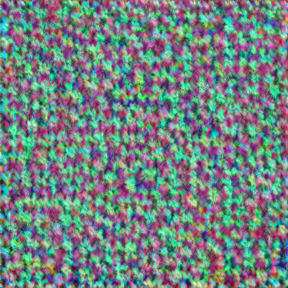

iter: 10, loss: 1.76858, losses: 0.892588, 0.875995


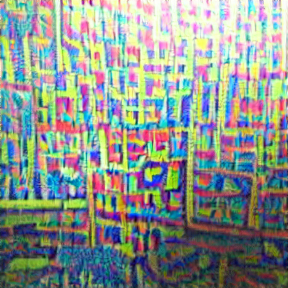

iter: 20, loss: 1.62871, losses: 0.828069, 0.800637


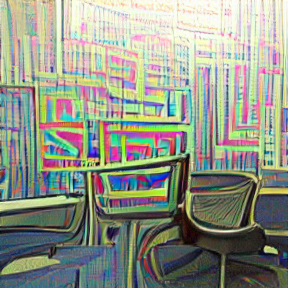

iter: 30, loss: 1.58882, losses: 0.805752, 0.783063


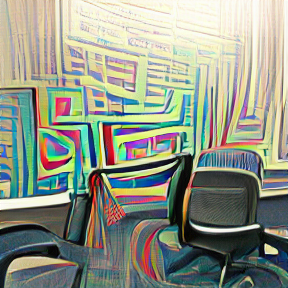

iter: 40, loss: 1.54844, losses: 0.782163, 0.76628


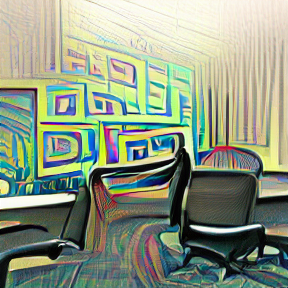

iter: 50, loss: 1.52942, losses: 0.767025, 0.762391


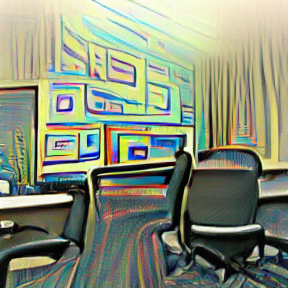

Generating video...


  0%|          | 0/49 [00:00<?, ?it/s]

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_imagenet_f16_16384.ckpt
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['Little red riding hood in the subway']
Using seed: 567100949247604942


0it [00:00, ?it/s]

iter: 0, loss: 2.00868, losses: 1.01394, 0.994739


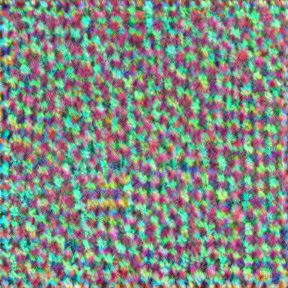

iter: 10, loss: 1.65889, losses: 0.834225, 0.824669


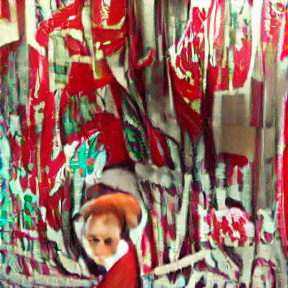

iter: 20, loss: 1.50762, losses: 0.749054, 0.758566


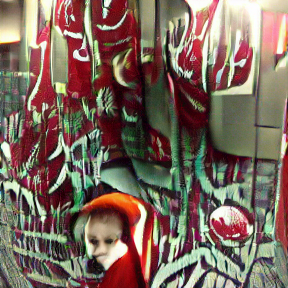

iter: 30, loss: 1.45994, losses: 0.729602, 0.730335


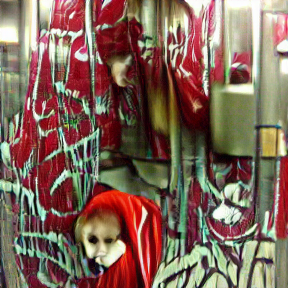

iter: 40, loss: 1.43804, losses: 0.717253, 0.720791


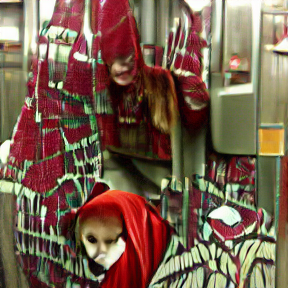

iter: 50, loss: 1.39589, losses: 0.705058, 0.690836


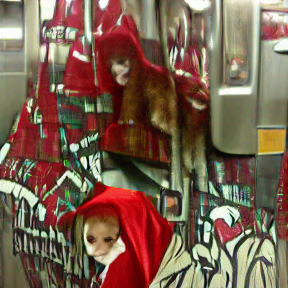

Generating video...


  0%|          | 0/49 [00:00<?, ?it/s]

In [ ]:
#@title Text2Art Gradio UI
import gradio as gr
import torch
import clipit
from google.colab import files

# Define the main function
def generate(prompt):
    torch.cuda.empty_cache()
    clipit.reset_settings()
    clipit.add_settings(prompts=prompt,iterations=50,make_video=True,aspect='square',quality='normal',display_every=10,)
    settings = clipit.apply_settings()
    clipit.do_init(settings)
    clipit.do_run(settings) 
    return 'output.png', 'output.mp4'


# Create the UI
prompt = gr.inputs.Textbox(default="I sit lonely in the crowded car", label="Share your Dream with the Hive")
# Launch the demo
## (my_pic, my_vid) = generate(prompt)
## iface = gr.Interface((my_pic, my_vid)), inputs=[prompt], outputs=['image', 'video'], enable_queue=True, live=False)
### files.download(my_pic) 
iface = gr.Interface(generate, inputs=[prompt], outputs=['image', 'video'], enable_queue=True, live=False,)
iface.launch(debug=True)
